In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

In [63]:
ROLASER_MODELS = ["roberta-maxpool", "roberta-maxpool-init", "roberta-meanpool", "roberta-meanpool-init"]
C_ROLASER_MODELS = ["c-roberta-maxpool", "c-roberta-maxpool-init", "c-roberta-meanpool", "c-roberta-meanpool-init"]

In [64]:
COLUMNS = ["loss_std_gold", "loss_ugc_gold", "valid_distil_loss"]

In [123]:
input_dir = "/home/lnishimw/scratch/experiments/robust-embeddings/laser/experiment_034_jz/scores"
all_scores = pd.read_csv(os.path.join(input_dir, "all_scores.csv")).sort_values(by="steps")

In [124]:
all_scores["model"].unique().size

2

In [125]:
x_formatter = ticker.ScalarFormatter(useMathText=True)
y_formatter = ticker.ScalarFormatter(useMathText=True)
y_formatter.set_powerlimits((-4, -4))  # Set the exponent range to (-4, -4)
x_formatter.set_powerlimits((5, 5))  # Set the exponent range to (5, 5)


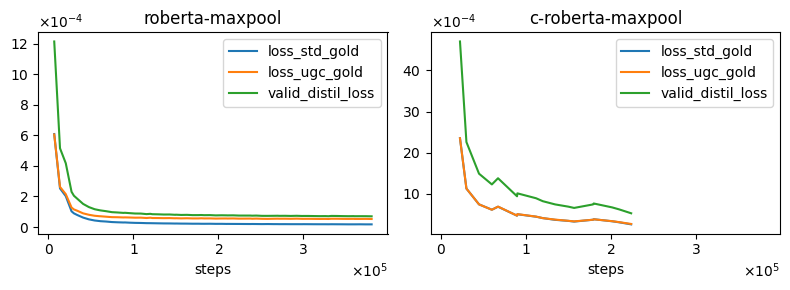

In [126]:
models = all_scores["model"].unique()

n_rows = models.size//2
n_cols = min(models.size, 2)
fig, axs = plt.subplots(n_rows, n_cols, squeeze=False, figsize=(4*n_cols, 3*n_rows), sharex=True)

for n, model in enumerate(models):
    i, j = n//2, n%2
    all_scores[all_scores["model"] == model].plot(x="steps", y=COLUMNS, ax=axs[i,j], title=model)
    axs[i,j].xaxis.set_major_formatter(x_formatter)
    axs[i,j].yaxis.set_major_formatter(y_formatter)
fig.tight_layout()
plt.savefig(os.path.join(input_dir, "models_valid.png"))
plt.savefig(os.path.join(input_dir, "models_valid.pdf"))

In [127]:
# fig, axs = plt.subplots(2, 2, squeeze=False, figsize=(9, 9))

# for n, model in enumerate(C_ROLASER_MODELS):
#     i, j = n//2, n%2
#     all_scores[all_scores["model"] == model].plot(x="steps", y=COLUMNS, ax=axs[i,j], title=model)
#     axs[i,j].xaxis.set_major_formatter(x_formatter)
#     axs[i,j].yaxis.set_major_formatter(y_formatter)
# fig.tight_layout()
# plt.savefig(os.path.join(input_dir, "c-RoLASER_models_valid.png"))
# plt.savefig(os.path.join(input_dir, "c-RoLASER_models_valid.pdf"))
